# 3

sources: 

my notes on likelihood, metro-hastings

codeium fast on \because symbol

https://www.freecodecamp.org/news/sort-dictionary-by-value-in-python/

claude 3.5 sonnet:
why conditional for (q,u) is greater than 1, appears miscount number of qs in emma.txt

the number of characters is off by much more than 1, chararray[q] should be 1296 not 375

---

**1**
How many possible codebooks are there given that each codebook is a permutation of the letters A to Z?


There there are 26! (factorial) possible codebooks. nPr = 26 P 26 = 26!/(26-26)! = 26!/0! = 26!


**2**
Would it be feasible to calculate $\pi(B)$ directly for a code book $B$ applied to an encrypted text $C$? 


Explain the different difficulties that might exist.



No, it would be infeasible to calculate $\pi(B)$ directly for a code book $B$ applied to an encrypted text $C$, because one must consider all of the many other potential code books which could have been applied and evaluate the probability that they were used. 

By Baye's,

$P(\lambda|D) = P(D|\lambda) * \frac{P(\lambda)}{P(D)}$

$P(B|C) = P(C|B) * \frac{P(B)}{P(C)}$

so

$\pi(B)=\frac{1}{Z} e^{l(A_B)} = \frac{1}{Z}P(A_B) = \frac{1}{Z}P(A|B) = \frac{P(B)}{P(A)}*P(A|B)$

$P(A|B) = P(B^{-1}(A))$ because the probability that the cipher appears for the code book is the chance that its plaintext appears in English.

$P(B)$ is just the prior probablity that the codebook is used, ie $1/26!$

$P(A)$ is difficult the determine because it is equal to the dot product of all of the probabilities of the codebooks and the probabilities of their decoded text. This is what makes the conditional difficult to solve.

**3**

Show that the sample “swap chain” on codebooks is a symmetric Markov Chain. That is to say, if 
$T$ is the Markov transition matrix for the swap chain and $B$ and $B'$ are two possible codebooks then $T(B, B')=T(B', B)$. Don’t try to write down $T$ as it is huge. Just argue directly. What is the probability of proposing any particular “swap” given a codebook $B$?

Case 1: $B$ can reach $B'$ in exactly one swap. Let $a$, $b$ be the characters which must be swapped to reach from $B$ to $B'$, or from $B'$ to $B$. Note that the swapping is symmetric, and swapping twice results in the same codebook. Then the chance the the unordered pair $(a,b)$ is chosen is

$T(B,B') = \frac{1}{26 \choose 2} = \frac{1}{325}= T(B',B)$

Case 2: $B$ cannot reach $B'$ in exactly one swap. Either $B = B'$, or $B'$ is 'far' from $B$ in terms of swaps needed. Then

$T(B,B') = 0 = T(B',B)$

**4**

We will use a Metropolis-Hastings MCMC algorithm to sample from the $\pi$ defined above. What is the acceptance probability if we use a proposal of the simple swap chain? Please simplify your expression using that the proposal chain is symmetric. Explain.

$\alpha(B,B') = min(1,\frac{\pi(B')T(B',B)}{\pi(B)T(B,B')}) = min(1,\frac{\pi(B')}{\pi(B)}) = min(1,e^{l(A_{B'})-l(A_B)})$

$\because T(B',B) = T(B,B')$

In [1]:
import random as rnd
def randomCodeBook(): 
    alpha = [chr(c) for c in range(ord('A'), ord('A')+26)]  # create list A-Z
    alpha2 = alpha.copy()  # Start with every letter mapping to itself
    rnd.shuffle(alpha2)  # shuffle letter around to create a random permutation
    codeBook = {a: code for a, code in zip(alpha, alpha2)}  # Make a dictionary
    return codeBook
codebook = randomCodeBook()
print(codebook)

{'A': 'I', 'B': 'W', 'C': 'T', 'D': 'X', 'E': 'L', 'F': 'A', 'G': 'Y', 'H': 'F', 'I': 'H', 'J': 'P', 'K': 'Q', 'L': 'N', 'M': 'B', 'N': 'O', 'O': 'Z', 'P': 'K', 'Q': 'E', 'R': 'G', 'S': 'M', 'T': 'V', 'U': 'J', 'V': 'S', 'W': 'C', 'X': 'R', 'Y': 'U', 'Z': 'D'}


In [2]:
# make sure the character is in the range we expect. Just a double-check.
def okChar(c):  
    if ((('A' <= c) and (c <= 'Z')) or (c == ' ')):
        return True
    return False
def applyCodeBook(text, code_book):
    out = []
    for c in text:
        if c == ' ':  # just keep spaces as spaces
            out.append(' ')
        elif okChar(c):  # if not ok, we just skip it.
            out.append(code_book[c])
    s = ""
    return s.join(out)
    
text = "in the land of the blind, the one eyed person is king"
text = text.upper()  # make upper case

encrypted_text = applyCodeBook(text, codebook)
print(f"Original Text: {text}")
print(f"Encrypted Text: {encrypted_text}")

Original Text: IN THE LAND OF THE BLIND, THE ONE EYED PERSON IS KING
Encrypted Text: HO VFL NIOX ZA VFL WNHOX VFL ZOL LULX KLGMZO HM QHOY


In [3]:
def invert_code_book(codeBook):
    # Switch the order to make inverse mapping
    inverted_book = {i[1]: i[0] for i in codeBook.items()}  
    return inverted_book


inverted_codebook = invert_code_book(codebook)
decoded_text = applyCodeBook(encrypted_text, inverted_codebook)
print(f"decoded Text: {decoded_text}")

decoded Text: IN THE LAND OF THE BLIND THE ONE EYED PERSON IS KING


In [4]:
import copy

def randSwapInCodeBook(codebook):
    codebook_2 = copy.deepcopy(codebook)
    o = rnd.sample([k for k in codebook_2], k=2)
    codebook_2[o[0]], codebook_2[o[1]] = codebook_2[o[1]], codebook_2[o[0]]
    return codebook_2

In [5]:
num_swaps = 2
for k in range(num_swaps):
    randSwapInCodeBook(inverted_codebook)
decoded_text = applyCodeBook(encrypted_text, inverted_codebook)
print(f"decoded Text with corrupted codebook: \n{decoded_text}")

decoded Text with corrupted codebook: 
IN THE LAND OF THE BLIND THE ONE EYED PERSON IS KING


In [6]:
def cleanText(text):
    text = text.upper()
    makeSpacesChar = [',', '!', '?', ';', '.', ':']  # characters to spaces
    for i in range(10):
        makeSpacesChar.append(str(i))  # add all of the numbers to the list
    for c in makeSpacesChar:
        text = text.replace(c, ' ')  # Replace each characters with a space
    text = ' '.join(text.split())  # Remove extra spaces 
    # Remove all characters who are not A-Z or Space:
    onlyGoodChar = [c for c in text if ((c <= 'Z') and (c >= 'A')) 
                    or (c == ' ')] 
    text = ''.join(onlyGoodChar)
    return text

$$ p(\beta|\alpha) = \frac{p(\alpha\cap\beta)}{p(\beta)}$$

to find conditional probabilities, iterate over each count of pairs and divide by the total number of occurences of the first letter.

In [7]:
def getCharCountsArray(text):
    char_counts_array = [0 for _ in range(256)]
    for i in range(len(text)-1):
        char_code = ord(text[i])
        char_counts_array[char_code] += 1
    return char_counts_array

def addPairCounts(pair_dict, text): 
    for i in range(len(text)-1):
        c1 = text[i]
        c2 = text[i+1]
        if (okChar(c1) and okChar(c2)):
            key = (c1, c2)
            if key in pair_dict:  # if key=(c1,c2) is already there
                pair_dict[key] += 1  # if it is add 
            else:
                pair_dict[key] = 1

def convertToConditional(pair_dict, text):
    char_counts_array = getCharCountsArray(text);
    for key in pair_dict.keys():
        c1 = key[0]
        c1_code = ord(c1)
        pair_dict[key] = pair_dict[key] / char_counts_array[c1_code]

In [8]:
def get_pair_dict_and_text(directory, fileNames):
    pair_dict = {}  # initialize empty pair dictionary
    all_text = ""
    for fileName in fileNames:  # cycle over the file names
        with open(directory+fileName, 'r') as file:
            text = file.read().replace('\n', '')
        text = cleanText(text)
        all_text += text
        addPairCounts(pair_dict, text)  # add the counts for the current file
    return (pair_dict, all_text)


In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

def log_likelihood(text, pair_dict):
    # return math.log(prob_of_text(text, pair_dict))
    logsum = 0
    for i in range(0, len(text)-2):
        logsum += math.log(max(pair_dict.get((text[i], text[i+1]), math.e ** -16), math.e**-16))
    return logsum

def likelihood_ratio(text, codebook_b1, codebook_b2, pair_dict):
    decodebook_b1 = invert_code_book(codebook_b1)
    decodebook_b2 = invert_code_book(codebook_b2)

    decoded_text_b1 = applyCodeBook(text, decodebook_b1)
    decoded_text_b2 = applyCodeBook(text, decodebook_b2)

    ll1 = log_likelihood(decoded_text_b1, pair_dict)
    ll2 = log_likelihood(decoded_text_b2, pair_dict)

    diff = ll1 - ll2

    if diff > 700:  # log(max float) is around 709
        return float('inf')
    elif diff < -700:
        return 0.0
    else:
        return float(np.exp(diff))

def run_mcmc(encoded_text, curr_codebook, plot = False):
    max_log_likelihood = -float('inf')
    max_log_likelihoods = []
    mkv_steps = []

    for i in range(10_000):
        prop_codebook = randSwapInCodeBook(curr_codebook)
        decoded_prop_codebook = applyCodeBook(encoded_text, prop_codebook)
        if (log_likelihood(decoded_prop_codebook, pair_dict) > max_log_likelihood):
            curr_codebook = prop_codebook
            max_log_likelihood = log_likelihood(applyCodeBook(encoded_text, curr_codebook), pair_dict)
            
            max_log_likelihoods.append(max_log_likelihood)
            mkv_steps.append(i)
            if plot:
                print(i, max_log_likelihood, applyCodeBook(encoded_text, curr_codebook))
    if plot:
        plt.plot(mkv_steps, max_log_likelihoods)
        plt.show()
    
    decoded_text = applyCodeBook(encoded_text, curr_codebook)
    print(len(decoded_text),decoded_text)
    return decoded_text

[(('Q', 'U'), 0.9992283950617284), (('V', 'E'), 0.7654331300643221), (('Y', ' '), 0.6953170327393287), (('Z', 'E'), 0.58656330749354), (('D', ' '), 0.5807258524597358), (('H', 'E'), 0.4199624800098413), (('B', 'E'), 0.4060287871637565), (('F', ' '), 0.363439420198519), (('S', ' '), 0.3560491856581242), (('G', ' '), 0.34802579687282514), (('E', ' '), 0.32282194297950534), (('K', ' '), 0.2973677352097993), (('K', 'E'), 0.2971071149335418), (('T', 'H'), 0.28602858002718945), (('J', 'E'), 0.27728613569321536), (('T', ' '), 0.2678573281721858), (('I', 'N'), 0.2590313696513737), (('J', 'U'), 0.2536873156342183), (('J', 'O'), 0.24424778761061947), (('R', ' '), 0.2393053404985275), (('R', 'E'), 0.22564289400977625), (('W', 'A'), 0.22487782529016492), (('N', ' '), 0.22476574387997544), (('J', 'A'), 0.2224188790560472), (('C', 'O'), 0.21141633704684834), (('M', 'E'), 0.2110009017132552), (('P', 'E'), 0.20367398882310628), (('A', 'N'), 0.19717856074379214), (('X', 'P'), 0.19574844995571303), (('W

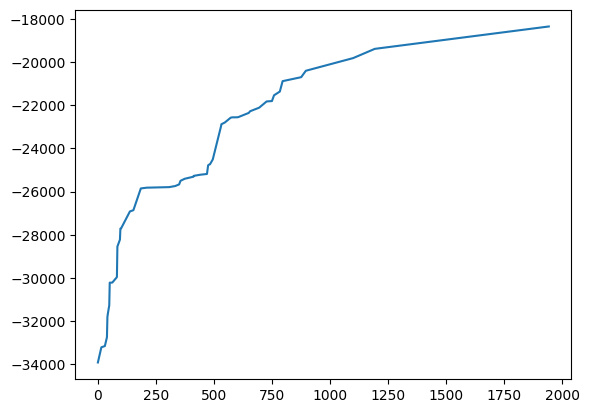

7857 WHEN IN THE COURSE OF HUMAN EVENTS IT BECOMES NECESSARY FOR ONE PEOPLE TO DISSOLVE THE POLITICAL BANDS WHICH HAVE CONNECTED THEM WITH ANOTHER AND TO ASSUME AMONG THE POWERS OF THE EARTH THE SEPARATE AND EQUAL STATION TO WHICH THE LAWS OF NATURE AND OF NATURES GOD ENTITLE THEM A DECENT RESPECT TO THE OPINIONS OF MANKIND REQUIRES THAT THEY SHOULD DECLARE THE CAUSES WHICH IMPEL THEM TO THE SEPARATION WE HOLD THESE TRUTHS TO BE SELFEVIDENT THAT ALL MEN ARE CREATED EQUAL THAT THEY ARE ENDOWED BY THEIR CREATOR WITH CERTAIN UNALIENABLE RIGHTS THAT AMONG THESE ARE LIFE LIBERTY AND THE PURSUIT OF HAPPINESS THAT TO SECURE THESE RIGHTS GOVERNMENTS ARE INSTITUTED AMONG MEN DERIVING THEIR JUST POWERS FROM THE CONSENT OF THE GOVERNED THAT WHENEVER ANY FORM OF GOVERNMENT BECOMES DESTRUCTIVE OF THESE ENDS IT IS THE RIGHT OF THE PEOPLE TO ALTER OR TO ABOLISH IT AND TO INSTITUTE NEW GOVERNMENT LAYING ITS FOUNDATION ON SUCH PRINCIPLES AND ORGANIZING ITS POWERS IN SUCH FORM AS TO THEM SHALL SEEM MOST

In [10]:
fileNames = ["emma.txt", "journey.txt"]
directory = "data/"
pair_dict, text = get_pair_dict_and_text(directory, fileNames)

convertToConditional(pair_dict, text)
print(sorted(pair_dict.items(), key=lambda item:item[1], reverse=True))

file_tag = open("encoded.txt", "r")  # read in encoded message
encoded_text = file_tag.read()

curr_codebook = randomCodeBook()

run_mcmc(encoded_text,curr_codebook,plot=True)

for i in range(10):
    encoded_text = encoded_text[0:int(len(encoded_text)/2)]
    run_mcmc(encoded_text,curr_codebook)
    
file_tag.close()




around len(text) = 500 the process breaks down